<a href="https://colab.research.google.com/github/Deon254/House_Pricing_Group_Work/blob/main/GroupTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV


Uploaded dataset


In [15]:
from google.colab import files
 
 
uploaded = files.upload()

Saving modified_data.csv to modified_data.csv


In [16]:
dataset = pd.read_csv("modified_data.csv")
dataset


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Decribing the data

In [17]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Preparing Data for Training

In [19]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
dataset.tail()

In [20]:
original_features=list(dataset.columns)
len(original_features)

77

Checking for Missing Values

In [21]:
dataset.isna().any()


Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 77, dtype: bool

In [22]:
features_with_missing=list(dataset.columns[dataset.isna().any()])
features_with_missing


['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [23]:
len(dataset)


1460

Filling in Missing *Values*

In [24]:
for feature in features_with_missing:
  print(feature,' ',(dataset[feature].isna().sum())/len(dataset)*100)

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [64]:
mean_fill=['LotFrontage','MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(features_with_missing)-set(mean_fill)-set(bfill))

In [66]:
for feature in mean_fill:
  dataset[feature].fillna(dataset[feature].mean(),inplace=True)

for feature in ffill:
  dataset[feature].fillna(method='ffill',inplace=True)

for feature in bfill:
  dataset[feature].fillna(method='bfill',inplace=True)

In [67]:
dataset.isna().any()


Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 77, dtype: bool

In [68]:
features_with_missing=list(dataset.columns[dataset.isna().any()])
features_with_missing

[]

Encoding the dataset

In [69]:
dataset.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType            int8
SaleCondition       int8
SalePrice          int64
Length: 77, dtype: object

In [70]:
category_data=dataset.select_dtypes(include=['object']).copy()
category_data.head()

,MSZoning,LandContour,LotConfig,Neighborhood
0,RL,Lvl,Inside,CollgCr
1,RL,Lvl,FR2,Veenker
2,RL,Lvl,Inside,CollgCr
3,RL,Lvl,Corner,Crawfor
4,RL,Lvl,FR2,NoRidge


In [71]:
category_features=list(category_data.columns)
category_features


['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood']

In [72]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal=list(set(category_features)-set(nominal))
original_features=list(dataset.columns)
numerical=list(set(original_features)-set(category_features))
target=['SalePrice']
dataset[target]


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [73]:
for feature in ordinal:
  dataset[feature]=(dataset[feature].astype('category')).cat.codes
  df_nominal=pd.get_dummies(dataset[nominal])
  df_ordinal=dataset[ordinal]
  df_numerical=dataset[numerical]
  encoded_data=pd.concat([df_numerical,df_nominal,df_ordinal],axis=1)

In [74]:
encoded_data.head()


,BsmtFullBath,GarageYrBlt,FullBath,SalePrice,MasVnrArea,Id,TotRmsAbvGrd,MSSubClass,GarageCars,OpenPorchSF,...,LotShape,BsmtQual,RoofStyle,Condition1,GarageQual,PavedDrive,Exterior2nd,HouseStyle,SaleType,RoofMatl
0,1,2003.0,2,208500,196.0,1,8,60,2,61,...,3,2,1,2,4,2,13,5,8,1
1,0,1976.0,2,181500,0.0,2,6,20,2,0,...,3,2,1,1,4,2,8,2,8,1
2,1,2001.0,2,223500,162.0,3,6,60,2,42,...,0,2,1,2,4,2,13,5,8,1
3,1,1998.0,1,140000,0.0,4,7,70,3,35,...,0,3,1,2,4,2,15,5,8,1
4,1,2000.0,2,250000,350.0,5,9,60,3,84,...,0,2,1,2,4,2,13,5,8,1


Standardize the Dataset

In [75]:
x=encoded_data.drop('SalePrice',axis=1)
y=dataset[target]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [76]:
y=y.to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [77]:
x=x.to_numpy()
x

array([[1.000e+00, 2.003e+03, 2.000e+00, ..., 5.000e+00, 8.000e+00,
        1.000e+00],
       [0.000e+00, 1.976e+03, 2.000e+00, ..., 2.000e+00, 8.000e+00,
        1.000e+00],
       [1.000e+00, 2.001e+03, 2.000e+00, ..., 5.000e+00, 8.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 1.941e+03, 2.000e+00, ..., 5.000e+00, 8.000e+00,
        1.000e+00],
       [1.000e+00, 1.950e+03, 1.000e+00, ..., 2.000e+00, 8.000e+00,
        1.000e+00],
       [1.000e+00, 1.965e+03, 1.000e+00, ..., 2.000e+00, 8.000e+00,
        1.000e+00]])

In [78]:
x.shape

(1460, 111)

In [150]:
x.reshape(-1,1)

array([[ 0.62616518],
       [-0.83695419],
       [ 0.04585129],
       ...,
       [ 1.00828739],
       [-0.37904755],
       [ 0.83319217]])

In [79]:
y.shape

(1460, 1)

In [118]:
y.reshape(-1,1)

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [123]:
x=StandardScaler().fit_transform(x)
x

array([[ 0.62616518, -0.83695419],
       [ 0.04585129,  0.99742637],
       [ 0.84372985, -0.46287502],
       ...,
       [ 0.3918188 ,  0.12481714],
       [-1.0242599 ,  1.00828739],
       [-0.37904755,  0.83319217]])

In [138]:
y=StandardScaler().fit_transform(y)
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

Feauture Extraction using PCA

In [139]:
pca=PCA(n_components=2)


In [140]:
p_components=pca.fit_transform(x)

In [141]:
p_components


array([[ 0.62616518, -0.83695419],
       [ 0.04585129,  0.99742637],
       [ 0.84372985, -0.46287502],
       ...,
       [ 0.3918188 ,  0.12481714],
       [-1.0242599 ,  1.00828739],
       [-0.37904755,  0.83319217]])

In [142]:
pca.explained_variance_ratio_

array([0.5, 0.5])

In [143]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,0.626165,-0.836954,0.347273
1,0.045851,0.997426,0.007288
2,0.843730,-0.462875,0.536154
3,-0.467692,0.554841,-0.515281
4,1.606932,0.160886,0.869843
...,...,...,...
1455,NaN,NaN,-0.074560
1456,NaN,NaN,0.366161
1457,NaN,NaN,1.077611
1458,NaN,NaN,-0.488523


In [165]:
x=p_components
x

array([[ 0.62616518, -0.83695419],
       [ 0.04585129,  0.99742637],
       [ 0.84372985, -0.46287502],
       ...,
       [ 0.3918188 ,  0.12481714],
       [-1.0242599 ,  1.00828739],
       [-0.37904755,  0.83319217]])

In [166]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

Training the model


In [168]:
regressor=LassoCV()


In [171]:
regressor.fit(p_components,y)

ValueError: ignored

In [ ]:
regressor.coef_


In [ ]:
regressor.intercept_

Plot

In [134]:
final_data_array=final_data.to_numpy()


In [136]:
min_val=np.min(final_data_array, axis=0)
max_val=np.max(final_data_array, axis=0)
X_plot,Y_plot=np.meshgrid(np.linspace(min_val[0],max_val[0],20),np.linspace(min_val[1],max_val[1],20))

In [ ]:
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

NameError: ignored

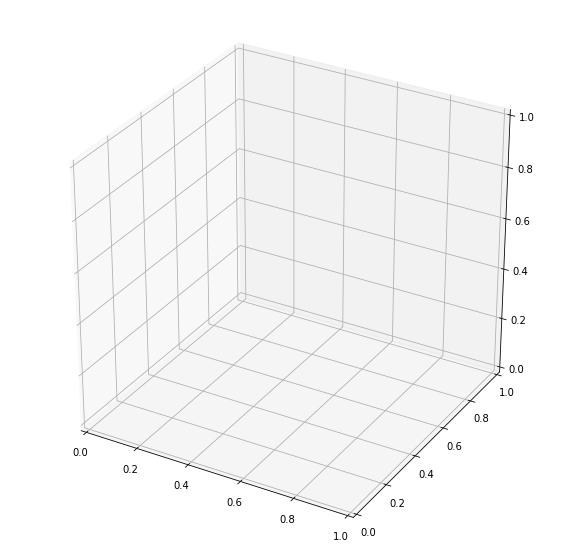

In [151]:
fig1=plt.figure(figsize=(10,10))
ax=fig1.gca(projection='3d')
ax.plot_surface(X_plot,Y_plot,Z_plot, rstride=1,cstride=1,alpha=0.9)
ax.scatter(final_data_array[:,0],final_data_array[:,1],final_data_array[:,2], c='r',s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title('Plane of best fit')